##### Employee Attrition

    Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

    They first identify a set of employees based on recommendations/ past performance
    Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
    At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

<img src="High-employee-turnover.jpg" width="50%" height="50%" />

    Learning Objective:
        - Understand the importance of predicting employee attrition prediction model for 
            organizational stability and talent retention.
        - Explore the process of building a predictive model using machine learning techniques.
        - Learn essential steps such as data exploration, cleaning, preprocessing, and model development.
        - Gain insights into factors influencing employee attrition prediction model like job
            satisfaction and promotion history.

    Have to import Important Libraries! 
        To do our Required Libraries like to have analysis and model Creation!
        
    1 Numpy and Pandas ['Pandas' relate to Numerical Pandas, 'Pandas' relate to Panel Data]
    2 Seaborn and Matplotlib for Visualization, means visualizing the Charts
    3 Warnings to ignore the warnings and more important Libraries.

In [338]:
# Libraries to Deal for Exploratory Data Analysis!
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, plotly.express as px
import missingno as msno
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [339]:
train_df = pd.read_csv('Train_Data.csv')
train_df.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [340]:
test_df = pd.read_csv('Test_Data.csv')
test_df.head()

employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0            0                  51  
2                  4              0            0                  47  
3                  9              0            0                  65  
4                  7              0            0                  61

In [341]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [342]:
train_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [343]:
train_df.drop('employee_id', axis = 1, inplace = True)
test_df.drop('employee_id', axis = 1, inplace = True)

<Axes: >

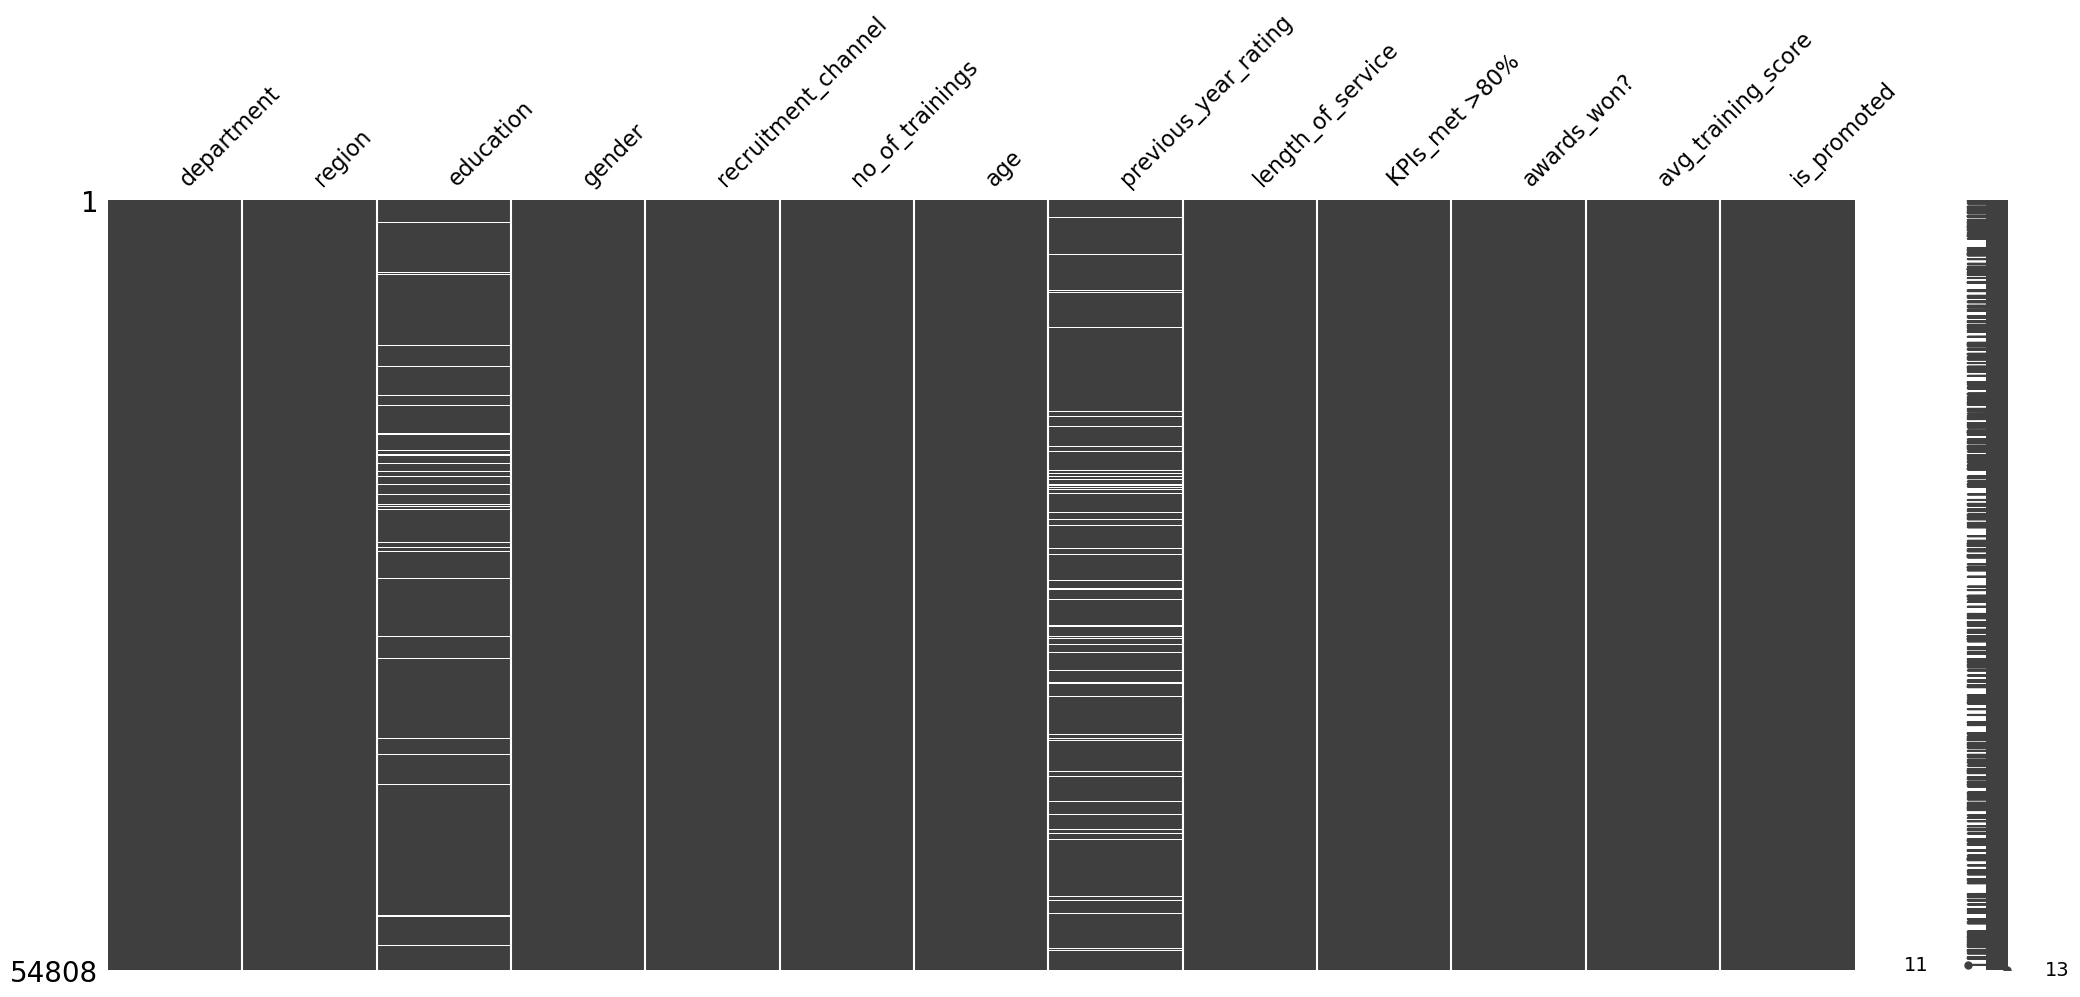

In [344]:
msno.matrix(train_df)

In [345]:
train_df.describe().round().style.format(precision = 2).background_gradient(cmap = 'Blues')

In [346]:
print(f"The number of Rows : {train_df.shape[0]} \nThe number of Columns : {train_df.shape[1]}")

The number of Rows : 54808 
The number of Columns : 13


In [347]:
train_df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

    The Overview i got from the given DataSet and the information regarding to us.
        1 The dataset is about the Employee Attrition where we have to fing the increment of the Employee.
        2 The dataset contains around 14 Columns with dtypes: float64(1), int64(8), object(5)
        3 As usual we have Null values in education and previous year rating.
        4 Talking about Shape and Size we have 54808 rows and 14 features having Target Feature.

    Need of Employee Attrition prediction
        - Importing libraries
        - Reading the dataset
        - Data exploration
        - Data cleaning
        - Splitting data – Train test split
        - Model Development

##### More Details of the DataSet
- Calculating the Null Values with the Percentage >>

In [348]:
def null_counter(data) :
    count = data.isnull().sum()
    percen = count / len(data) * 100

    count.sort_values(ascending = False)
    percen.sort_values(ascending = False)

    df_null = pd.DataFrame({
        'column name' : data.columns,
        'total count' : count,
        'percentage' : percen
    })

    df_null.reset_index(drop = True, inplace = True)
    df_null_sorted = df_null.sort_values(by='percentage', ascending=False)
    df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
    return df_filtered

In [349]:
null_counter(train_df)

column name  total count  percentage
7  previous_year_rating         4124    7.524449
2             education         2409    4.395344

In [350]:
null_counter(test_df)

column name  total count  percentage
7  previous_year_rating         1812    7.713921
2             education         1034    4.401873

###### Imputing the Null values to make it clean.

In [351]:
# Let's fill up the NULL values with the Relatable Columns
train_df.education.value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [352]:
train_df.education.fillna('Below Secondary', inplace=True)

In [353]:
test_df.education.fillna('Below Secondary', inplace=True)

In [354]:
train_df.education.value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary      3214
Name: count, dtype: int64

In [355]:
train_df.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

    As by watching the Eductaion we had filled the values but its hard to give previous_year_rating as 
        we are not sure what are the factors here.

In [356]:
train_df[np.isnan(train_df['previous_year_rating'])].head()
# As previous year ratings also have many NULL values let's fill this also

department     region        education gender recruitment_channel  \
10         Technology  region_23  Below Secondary      m            sourcing   
23        Procurement   region_5       Bachelor's      m               other   
29  Sales & Marketing   region_4       Bachelor's      m            sourcing   
56  Sales & Marketing  region_31       Bachelor's      f               other   
58  Sales & Marketing  region_16       Bachelor's      m               other   

    no_of_trainings  age  previous_year_rating  length_of_service  \
10                1   30                   NaN                  1   
23                1   27                   NaN                  1   
29                1   26                   NaN                  1   
56                1   29                   NaN                  1   
58                2   27                   NaN                  1   

    KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
10              0            0                  77            0  
23              0            0                  70            0  
29              0            0                  44            0  
56              0            0                  49            0  
58              1            0                  47            0

In [357]:
null_emp = train_df[np.isnan(train_df['previous_year_rating'])]
null_emp

department     region        education gender  \
10            Technology  region_23  Below Secondary      m   
23           Procurement   region_5       Bachelor's      m   
29     Sales & Marketing   region_4       Bachelor's      m   
56     Sales & Marketing  region_31       Bachelor's      f   
58     Sales & Marketing  region_16       Bachelor's      m   
...                  ...        ...              ...    ...   
54703                R&D  region_31       Bachelor's      m   
54734         Operations  region_15       Bachelor's      m   
54746            Finance   region_6       Bachelor's      m   
54773            Finance   region_2       Bachelor's      m   
54801         Technology  region_26       Bachelor's      f   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
10               sourcing                1   30                   NaN   
23                  other                1   27                   NaN   
29               sourcing                1   26                   NaN   
56                  other                1   29                   NaN   
58                  other                2   27                   NaN   
...                   ...              ...  ...                   ...   
54703            sourcing                1   30                   NaN   
54734            sourcing                1   31                   NaN   
54746               other                1   28                   NaN   
54773               other                1   23                   NaN   
54801            sourcing                1   31                   NaN   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
10                     1              0            0                  77   
23                     1              0            0                  70   
29                     1              0            0                  44   
56                     1              0            0                  49   
58                     1              1            0                  47   
...                  ...            ...          ...                 ...   
54703                  1              1            0                  88   
54734                  1              1            0                  56   
54746                  1              1            0                  61   
54773                  1              1            0                  61   
54801                  1              0            0                  78   

       is_promoted  
10               0  
23               0  
29               0  
56               0  
58               0  
...            ...  
54703            0  
54734            1  
54746            0  
54773            0  
54801            0  

[4124 rows x 13 columns]

In [358]:
def pivot(col_1, col_2) :
    rec_promp = train_df.pivot_table (
        values = col_2,
        index = col_1,
        aggfunc = {'sum', 'count'}
    )
    
    rec_promp['percentage'] = (rec_promp['sum'] / rec_promp['count']) * 100
    
    return rec_promp

In [359]:
pivot('education', 'is_promoted')

count   sum  percentage
education                                
Bachelor's        36669  3008    8.203114
Below Secondary    3214   189    5.880523
Master's & above  14925  1471    9.855946

    As can see that the percent of promotion is same in the all the fields

In [360]:
pivot('gender', 'is_promoted')

count   sum  percentage
gender                         
f       16312  1467    8.993379
m       38496  3201    8.315150

    As this seems same all the promotions are in same ratio and had to check the other factors::
        As because we have 8% Null rows.

In [361]:
train_df.head()

department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   
2                1   34                   3.0                  7   
3                2   39                   1.0                 10   
4                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0

In [362]:
null_emp['length_of_service'].value_counts()

length_of_service
1    4124
Name: count, dtype: int64

    We'll this seems that employess are new so they dont have there promotion we know that if any one gets promotion
    had an experience of atleast 1 yr. So previous year rating must be the most the length of service got

In [363]:
filtered_df = train_df[train_df['length_of_service'] == 1]
rating_counts = filtered_df['previous_year_rating'].value_counts()
rating_counts

previous_year_rating
3.0    158
4.0    114
5.0     64
1.0     44
2.0     43
Name: count, dtype: int64

    So most of the new employees got 3 stars that determines that the freshers work best most in cases so 
    imputing by the most ratings the employee got.

In [364]:
train_df['previous_year_rating'].fillna(train_df['previous_year_rating'].mode()[0], inplace=True)
test_df['previous_year_rating'].fillna(test_df['previous_year_rating'].mode()[0], inplace=True)

In [365]:
null_counter(train_df)

Empty DataFrame
Columns: [column name, total count, percentage]
Index: []

In [366]:
null_counter(test_df)

Empty DataFrame
Columns: [column name, total count, percentage]
Index: []

    So we had filled all our Null values.

##### Exploratory Data Analysis.

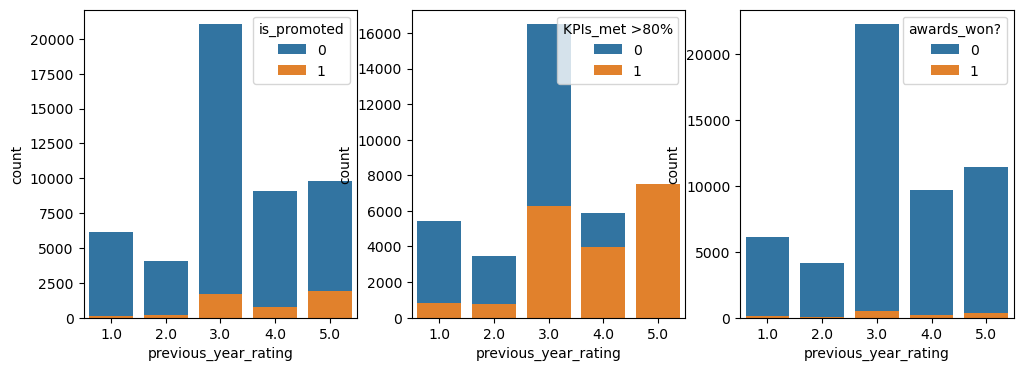

In [367]:
plt.figure(figsize=[12, 4])
plt.subplot(1,3,1)
sns.countplot(x = train_df.previous_year_rating, hue = train_df['is_promoted'], dodge=False)
plt.subplot(1,3,2)
sns.countplot(x = train_df.previous_year_rating, hue = train_df['KPIs_met >80%'], dodge=False)
plt.subplot(1,3,3)
sns.countplot(x = train_df.previous_year_rating, hue = train_df["awards_won?"], dodge=False)
plt.show()

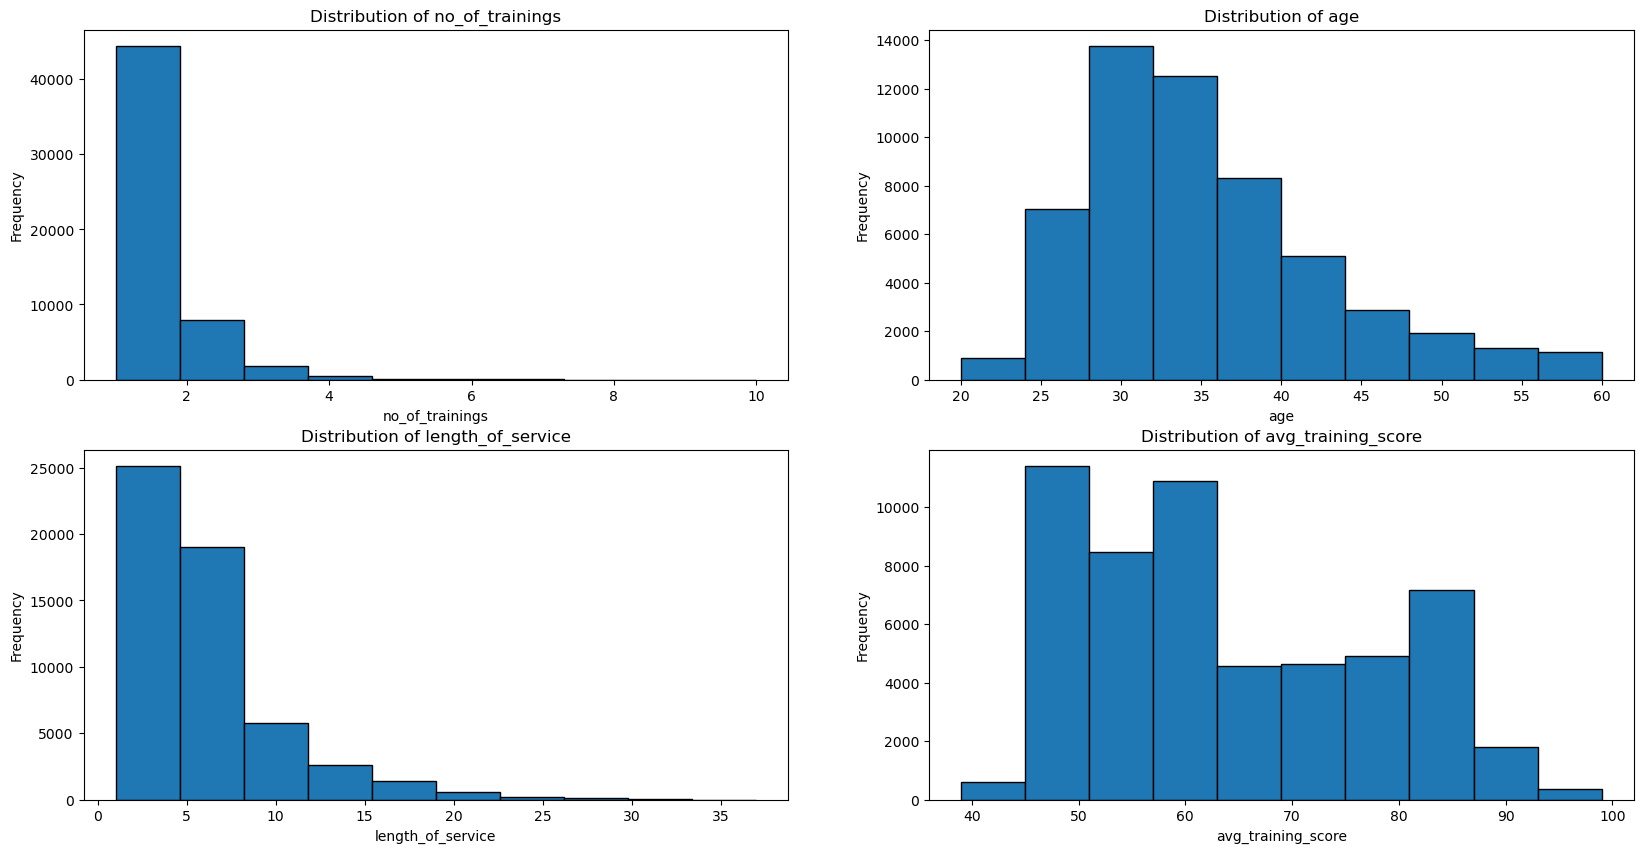

In [368]:
dist_cols = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']
i = 1

plt.figure(figsize = [20, 10])
for col in dist_cols:
    plt.subplot(2, 2, i)
    plt.hist(train_df[col], bins = 10, edgecolor = 'black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    i += 1
plt.show()

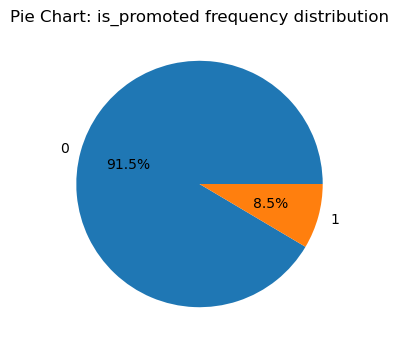

In [369]:
counter = Counter(train_df['is_promoted'])
plt.figure(figsize = [4, 4])
plt.pie(list(counter.values()), labels=list(counter.keys()), autopct="%1.1f%%")
plt.title('Pie Chart: is_promoted frequency distribution')
plt.show()

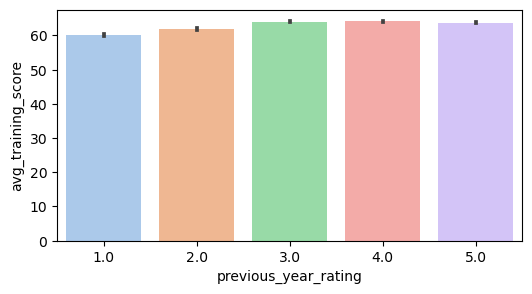

In [370]:
plt.figure(figsize = [6, 3])
sns.barplot(x = 'previous_year_rating', y = 'avg_training_score', data = train_df, palette = 'pastel')
plt.show()

<Axes: xlabel='gender'>

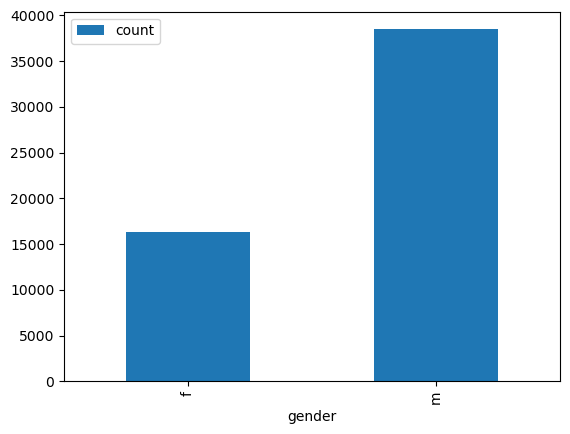

In [371]:
# plt.figure(figsize = [4, 1])
train_df.groupby('gender')['is_promoted'].aggregate(["count"]).plot.bar()

<Axes: xlabel='gender', ylabel='count'>

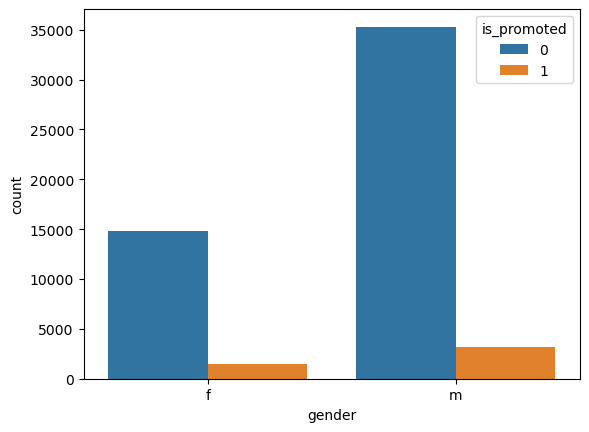

In [372]:
sns.countplot(x = train_df.gender, hue = train_df['is_promoted'])

<Axes: xlabel='recruitment_channel', ylabel='count'>

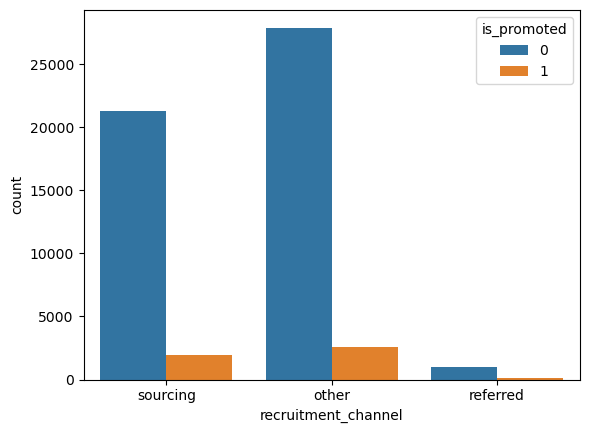

In [373]:
sns.countplot(x = train_df.recruitment_channel, hue = train_df['is_promoted'])

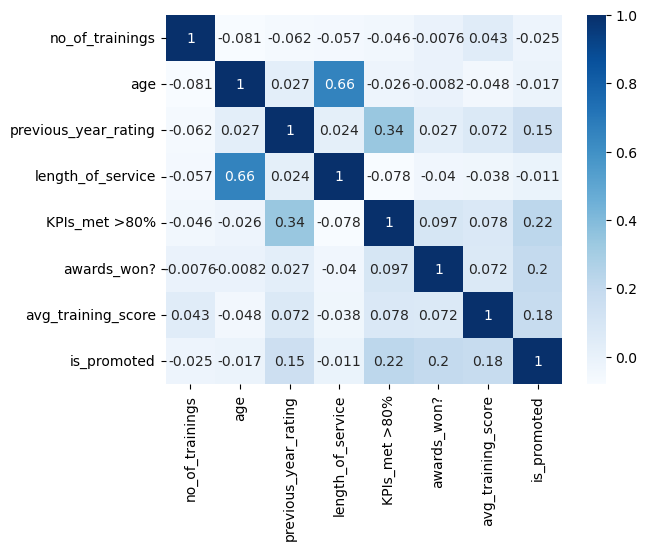

In [374]:
sns.heatmap(train_df[[
    'no_of_trainings',
    'age',
    'previous_year_rating',
    'length_of_service',
    'KPIs_met >80%',
    'awards_won?',
    'avg_training_score',
    'is_promoted'
]].corr(), annot= True, cmap= "Blues")
plt.show()

In [375]:
fig = px.scatter(
    train_df,
    x = "age",
    y = "length_of_service",
    color = "is_promoted",
    title = "Scatter Plot of Age vs Length of Service",
    labels = {"is_promoted": "Promoted"},
    hover_data = ["age", "length_of_service"]
)

fig.show()

In [376]:
fig = px.histogram(
    train_df,
    x = "age",
    color = "is_promoted",
    title = "Age Distribution by Promotion Status",
    labels = {"is_promoted": "Promoted"},
    barmode = 'overlay',
    opacity = 0.75
)

fig.show()

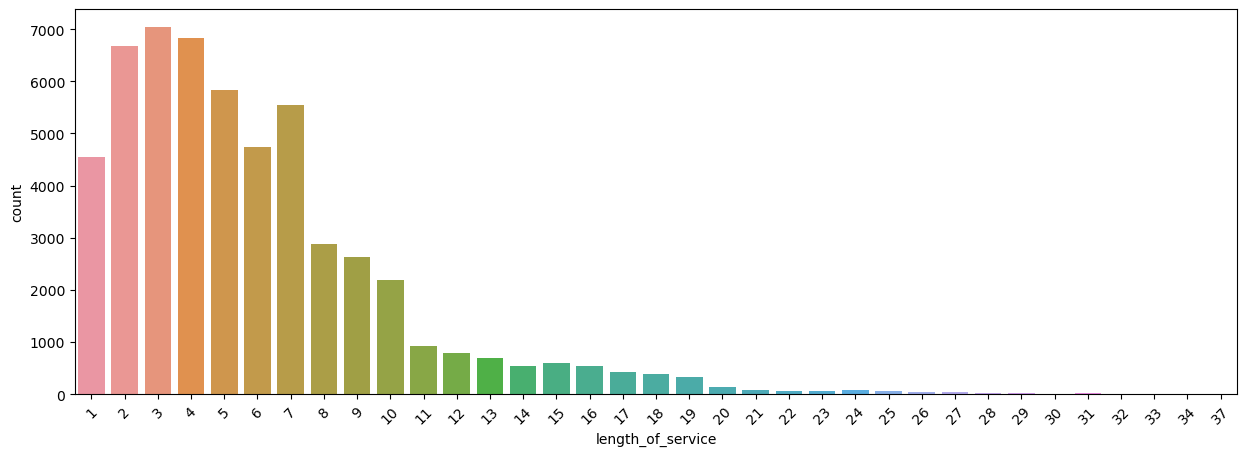

In [377]:
plt.figure(figsize = (15,5))
sns.countplot(data = train_df, x = "length_of_service")
plt.xticks(rotation = 45)
plt.show()

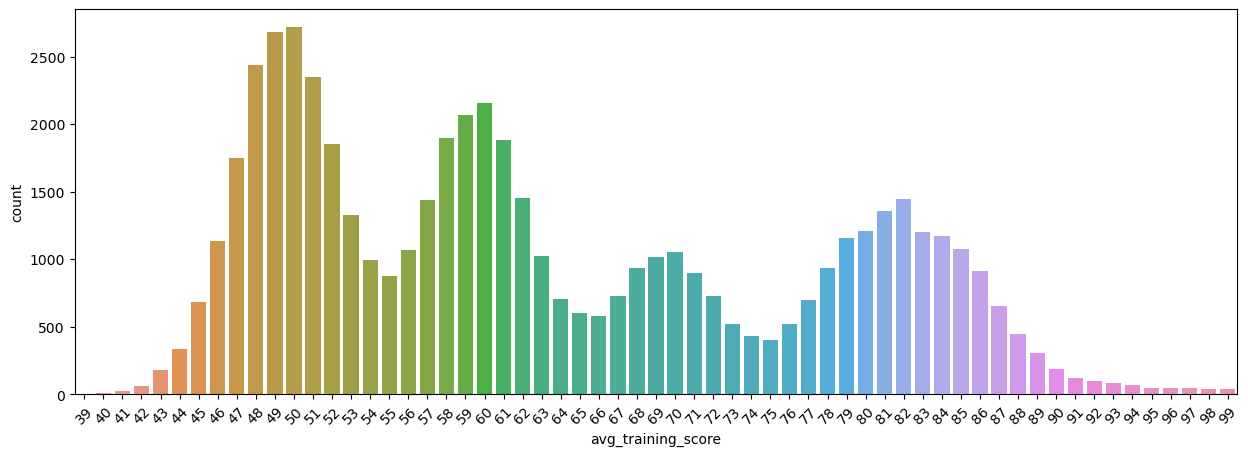

In [378]:
plt.figure(figsize = (15,5))
sns.countplot(data = train_df, x = "avg_training_score")
plt.xticks(rotation = 45)
plt.show()

In [379]:
minority_class = train_df[train_df['is_promoted'] == 1]
majority_class = train_df[train_df['is_promoted'] == 0]

In [380]:
from sklearn.utils import resample
sample = resample(minority_class, replace = True, n_samples = len(majority_class), random_state = 42)

In [381]:
odf_train = pd.concat([majority_class, sample])

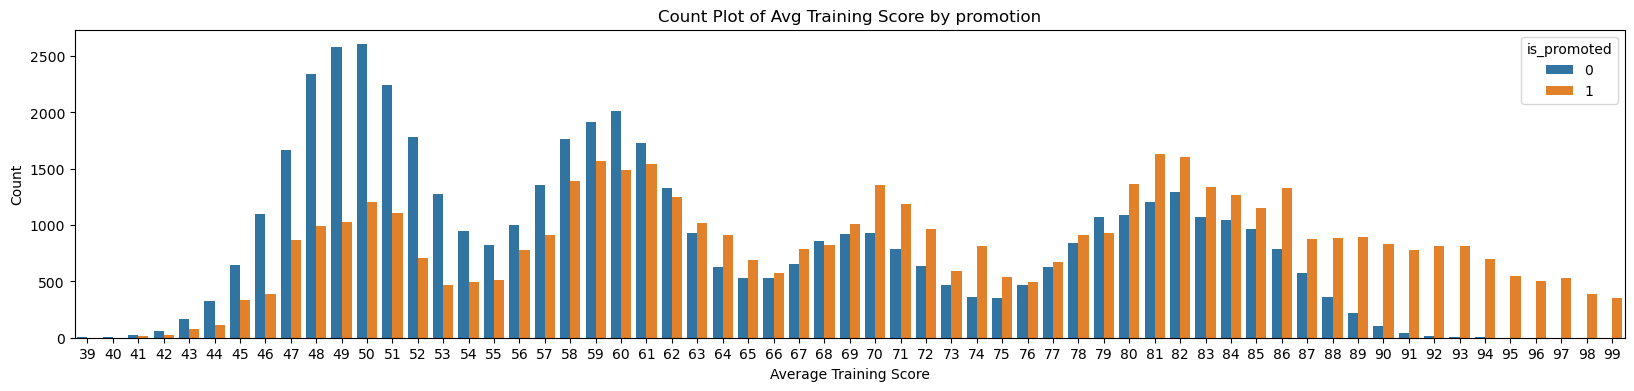

In [382]:
plt.figure(figsize = [20, 4])
sns.countplot(x = 'avg_training_score', hue = 'is_promoted', data = odf_train)
plt.title('Count Plot of Avg Training Score by promotion')
plt.xlabel('Average Training Score')
plt.ylabel('Count')
plt.legend(title = 'is_promoted', labels = [0, 1])
plt.show()

In [383]:
fig = px.histogram(odf_train,
    x = 'avg_training_score', color = 'is_promoted',
    title='Count Plot of Avg Training Score by Promotion',
    labels={'is_promoted': 'Is Promoted'},
    barmode = 'group', category_orders={'avg_training_score': sorted(odf_train['avg_training_score'].unique())}
)

fig.update_layout( xaxis_title='Average Training Score', yaxis_title='Count', 
                  xaxis_tickangle=-90,legend_title_text='Is Promoted')

fig.show()

###### Summary of Observations and Results
    Observation:
        - Employees who achieve high average training scores are more likely to be promoted.
        - Conversely, employees with low average training scores tend to remain unpromoted.
    
    Results:
    The following factors exhibit a strong relationship with the target variable, is_promoted:
        previous_year_rating: Higher ratings are associated with increased promotion likelihood.
        awards_won?: Employees who have won awards tend to have a higher chance of being promoted.
        avg_training_score: A significant positive correlation exists, where higher training scores 
            correspond to higher promotion rates.
    
    Conclusion
        The analysis indicates that training performance and recognition play crucial roles in employee promotions. 
        Focusing on improving training scores and acknowledging employee achievements could enhance promotion outcomes.

`So shifting on Feature Engineering, Selection and more with Making Model`

##### Model Libraries and model selection

    Scikit-Learn Libraries:
        - train_test_split: Useful for splitting datasets into training and testing sets.
        - StandardScaler: For scaling features to improve model performance.
        - Logistic Regression: An example of a machine learning model from sklearn.
        - Evaluation metrics like accuracy_score and classification_report help assess the model's performance.

In [384]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier

    Selecting features for making columns numerics

In [385]:
num_df = train_df.select_dtypes(include = 'number')

In [386]:
cat_df = train_df.select_dtypes(include = 'object')

In [387]:
cat_df.head()

department     region         education gender recruitment_channel
0  Sales & Marketing   region_7  Master's & above      f            sourcing
1         Operations  region_22        Bachelor's      m               other
2  Sales & Marketing  region_19        Bachelor's      m            sourcing
3  Sales & Marketing  region_23        Bachelor's      m               other
4         Technology  region_26        Bachelor's      m               other

    Label Encoding for 
        Gender, Recruitment Channel, Education
        
    One Hot Encoding for
        Department, Region

##### Label Encoding

In [388]:
# Define the mappings
gender_mapping = {'m': 2, 'f': 1}
education_mapping = {"Bachelor's": 2, "Master's & above": 1, "Below Secondary": 3}
recruitment_mapping = {'other': 3, 'sourcing': 2, 'referred': 1}

# Apply the mappings on Training DataSet
train_df['gender'] = train_df['gender'].map(gender_mapping)
train_df['education'] = train_df['education'].map(education_mapping)
train_df['recruitment_channel'] = train_df['recruitment_channel'].map(recruitment_mapping)

# Apply the mappings on Testing DataSet
test_df['gender'] = test_df['gender'].map(gender_mapping)
test_df['education'] = test_df['education'].map(education_mapping)
test_df['recruitment_channel'] = test_df['recruitment_channel'].map(recruitment_mapping)

##### One Hot Encoding

In [389]:
df_dumm = pd.get_dummies(train_df[['department', 'region']], dtype = int, drop_first = True)
df_dumm.head()

department_Finance  department_HR  department_Legal  department_Operations  \
0                   0              0                 0                      0   
1                   0              0                 0                      1   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   department_Procurement  department_R&D  department_Sales & Marketing  \
0                       0               0                             1   
1                       0               0                             0   
2                       0               0                             1   
3                       0               0                             1   
4                       0               0                             0   

   department_Technology  region_region_10  region_region_11  ...  \
0                      0                 0                 0  ...   
1                      0                 0                 0  ...   
2                      0                 0                 0  ...   
3                      0                 0                 0  ...   
4                      1                 0                 0  ...   

   region_region_31  region_region_32  region_region_33  region_region_34  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   region_region_4  region_region_5  region_region_6  region_region_7  \
0                0                0                0                1   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   region_region_8  region_region_9  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 41 columns]

In [390]:
train_df.drop(['department', 'region'], inplace = True, axis = 1)
test_df.drop(['department', 'region'], inplace = True, axis = 1)

In [391]:
train_df = pd.concat([df_dumm, train_df], axis = 1)
test_df = pd.concat([df_dumm_test, test_df], axis = 1)

In [392]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   department_Finance            54808 non-null  int32  
 1   department_HR                 54808 non-null  int32  
 2   department_Legal              54808 non-null  int32  
 3   department_Operations         54808 non-null  int32  
 4   department_Procurement        54808 non-null  int32  
 5   department_R&D                54808 non-null  int32  
 6   department_Sales & Marketing  54808 non-null  int32  
 7   department_Technology         54808 non-null  int32  
 8   region_region_10              54808 non-null  int32  
 9   region_region_11              54808 non-null  int32  
 10  region_region_12              54808 non-null  int32  
 11  region_region_13              54808 non-null  int32  
 12  region_region_14              54808 non-null  int32  
 13  r

In [393]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   department_Finance            23490 non-null  int32  
 1   department_HR                 23490 non-null  int32  
 2   department_Legal              23490 non-null  int32  
 3   department_Operations         23490 non-null  int32  
 4   department_Procurement        23490 non-null  int32  
 5   department_R&D                23490 non-null  int32  
 6   department_Sales & Marketing  23490 non-null  int32  
 7   department_Technology         23490 non-null  int32  
 8   region_region_10              23490 non-null  int32  
 9   region_region_11              23490 non-null  int32  
 10  region_region_12              23490 non-null  int32  
 11  region_region_13              23490 non-null  int32  
 12  region_region_14              23490 non-null  int32  
 13  r

##### Logistic Regression Test

In [394]:
train_x = train_df.drop(columns = ['is_promoted'])
train_y = train_df['is_promoted']

In [395]:
model = LogisticRegression()
model = model.fit(train_x, train_y)
model

LogisticRegression()

In [396]:
y_train_pred = model.predict(train_x)

In [397]:
print("Value of accuracy_score : ", accuracy_score(train_y, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(train_y, y_train_pred))
print("Value of classification_report : ", classification_report(train_y, y_train_pred))

Value of accuracy_score :  0.9197379944533645
Value of confusion_matrix :  [[49868   272]
 [ 4127   541]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.92      0.99      0.96     50140
           1       0.67      0.12      0.20      4668

    accuracy                           0.92     54808
   macro avg       0.79      0.56      0.58     54808
weighted avg       0.90      0.92      0.89     54808



##### Decision Tree Classifier

In [398]:
dt_rgs = DecisionTreeClassifier()

hyp_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth' : np.arange(3, 15),
    'min_samples_split' : np.arange(2, 20),
    'min_samples_leaf' : np.arange(1, 20)
}

model_2 = RandomizedSearchCV(dt_rgs, hyp_grid, cv = 5)

In [399]:
model_2.fit(train_x, train_y)
model_2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=3,
                       min_samples_split=5)

In [400]:
decision = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=4, min_samples_split=14)
decision.fit(train_x, train_y)
decision

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=4,
                       min_samples_split=14)

In [401]:
y_train_pred = decision.predict(train_x)

In [402]:
print("Value of accuracy_score : ", accuracy_score(train_y, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(train_y, y_train_pred))
print("Value of classification_report : ", classification_report(train_y, y_train_pred))

Value of accuracy_score :  0.9431287403298788
Value of confusion_matrix :  [[50036   104]
 [ 3013  1655]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.94      1.00      0.97     50140
           1       0.94      0.35      0.52      4668

    accuracy                           0.94     54808
   macro avg       0.94      0.68      0.74     54808
weighted avg       0.94      0.94      0.93     54808



##### Filling the Testing Data into the is_promoted

In [403]:
test_predict = decision.predict(test_df)

In [404]:
test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [405]:
test_df['now_can_promoted'] = test_predict

In [406]:
test_df['now_can_promoted'].value_counts()

now_can_promoted
0    22786
1      704
Name: count, dtype: int64

##### Filling values in Test DataSet

In [407]:
test_final = pd.read_csv('Test_Data.csv')
test_final.head()

employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0            0                  51  
2                  4              0            0                  47  
3                  9              0            0                  65  
4                  7              0            0                  61

In [408]:
test_final['is_promoted'] = test_predict

In [409]:
test_final['is_promoted'].value_counts()

is_promoted
0    22786
1      704
Name: count, dtype: int64

##### Reading Submission files.

In [410]:
sub_df = pd.read_csv('Sample_Submission.csv')

In [411]:
test_final.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [412]:
sub_df.head()

employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0

In [413]:
test_final.set_index('employee_id', inplace=True)
sub_df['is_promoted'] = sub_df['employee_id'].map(test_final['is_promoted'])

In [414]:
sub_df.head()

employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0

In [415]:
sub_df['is_promoted'].value_counts()

is_promoted
0    22786
1      704
Name: count, dtype: int64

In [416]:
sub_df.to_csv('submission.csv', index=False)

# Thanku for Scrolling -- Vikas Kumar Ram